I compare the perceptron learning algorithm and the delta rule in order to show that when there is at least one outliner, the perceptron algorithm will diverge.
To do this I implement a perceptron learning algorithm that updates weights based on misclassified samples. Due to the outliers, the algorithm does not converge and it will enter to an infinite loop if we remove z.
In the delta rule example i used gradient-based update in order to let it converges.

I generate a dataset with 4 outliners

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def create_dataset_with_outliers(n_samples=100, n_outliers=4):
    np.random.seed(0)
    X_class1 = np.random.randn(n_samples // 2, 2) + np.array([2, 2])
    X_class2 = np.random.randn(n_samples // 2, 2) + np.array([-2, -2])
    X = np.vstack((X_class1, X_class2))
    y = np.hstack((np.ones(n_samples // 2), -1 * np.ones(n_samples // 2)))
    outliers_X = np.array([[3, 3], [-3, -3], [3, -3], [-3, 3]])
    X = np.vstack((X, outliers_X))
    y_outliers = np.array([-1, 1, 1, -1])
    y = np.hstack((y, y_outliers))
    return X, y

In [ ]:
X, y = create_dataset_with_outliers()

In this situation as we know, the algorithm does not converge , as a matter of facts, if we try to remove z, it doesn't give us a result and it goes in a infinite loop

In [ ]:
#percepton learning algorithm
def l_algo(X, miu):
  n = X.shape[1]
  w = np.random.randint(1, 100, (n))
  i = np.random.randint(0, n-1)
  x = X[i]
  t = X[i, -1]
  z = 0
  #try to remove z
  while(are_all_correct(X,w) == False and z < 100):
    i = np.random.randint(1, n)
    x = X[i]
    t = X[i, -1]
    o = np.sign(np.dot(w, x))
    w = w + miu*(t-o)*x
    z = z+1;
  return w


def are_all_correct(X, w):
    for i in range(X.shape[0]):
        x = X[i]
        t = X[i, -1]
        if t != np.sign(np.dot(x.T, w)):
            return False
    return True


In [ ]:
def plot_decision_boundary(X, y, w):
  plt.scatter(X[y == 1][:, 0], X[y == 1][:, 1], color='blue', label='Class 1')
  plt.scatter(X[y == -1][:, 0], X[y == -1][:, 1], color='red', label='Class -1')

  x_values = np.array([min(X[:, 0]) - 1, max(X[:, 0]) + 1])
  y_values = - (w[0] / w[1]) * x_values
  plt.plot(x_values, y_values, label="Decision Boundary", color="green")

  plt.title('Dataset with Outliers and Decision Boundary')
  plt.xlabel('Feature 1')
  plt.ylabel('Feature 2')
  plt.legend()
  plt.show()



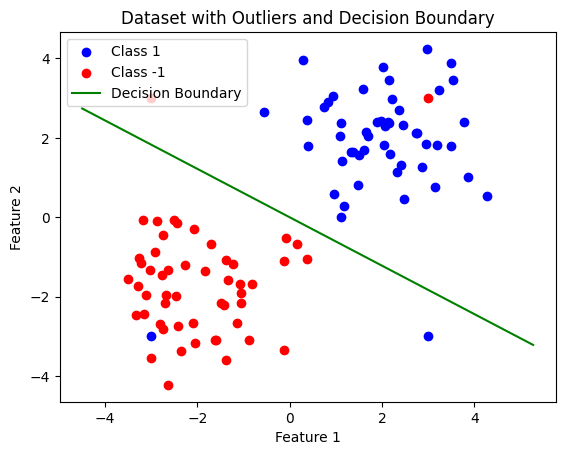

In [ ]:
X_with_labels = np.hstack((X, y.reshape(-1, 1)))
miu = 0.04
w_perc = l_algo(X_with_labels, miu)
plot_decision_boundary(X, y, w_perc)

Now we implement the delta rule with linear activation

In [ ]:
def delta_rule(X, y, w, miu):
    grad_weight = np.zeros(w.shape)
    for j in range(X.shape[0]):
        for i in range(len(w)):
            o = np.sign(np.dot(w, X[j]))
            t = y[j]
            grad_weight[i] += miu * (t - o) * X[j, i]

    for i in range(len(w)):
        w[i] += grad_weight[i]

    return w

In [ ]:
miu = 0.04
w_gradient = np.random.randn(X.shape[1])

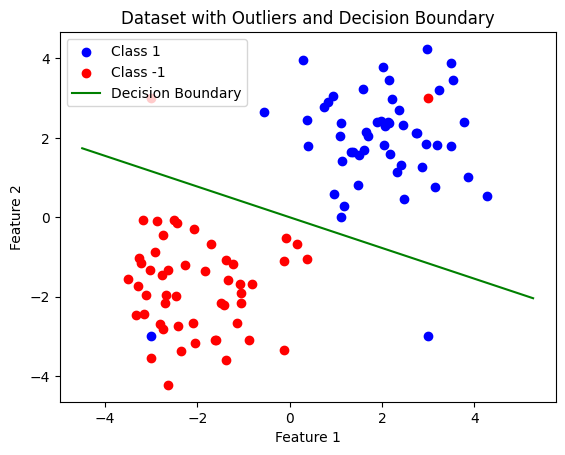

In [ ]:
w_gradient = delta_rule(X, y, w_gradient, miu)
plot_decision_boundary(X, y, w_gradient)